# Car Price Prediction

In [106]:
##Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [107]:
##Loading dataset into dataframe using pandas
dataset=pd.read_csv('car data.csv')

## Exploring Dataset

In [108]:
## First 5 rows in dataframe
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [109]:
## Shape of dataframe
dataset.shape

(301, 9)

In [110]:
## The type of datatypes in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In the dataset we have 3 categorical features, 2 continuous numerical feature and 1 identifier 

In [111]:
## To know statistical details
dataset.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


We can see that data is from 2003 to 2018 cars

In [112]:
## Checking for NAN values
dataset.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

There are no nan values

### Exploring features

In [113]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [114]:
##To know the length of types of car names 
len(dataset['Car_Name'].value_counts())

98

In [115]:
## Type of identifiers in the dataset
dataset['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of cars')

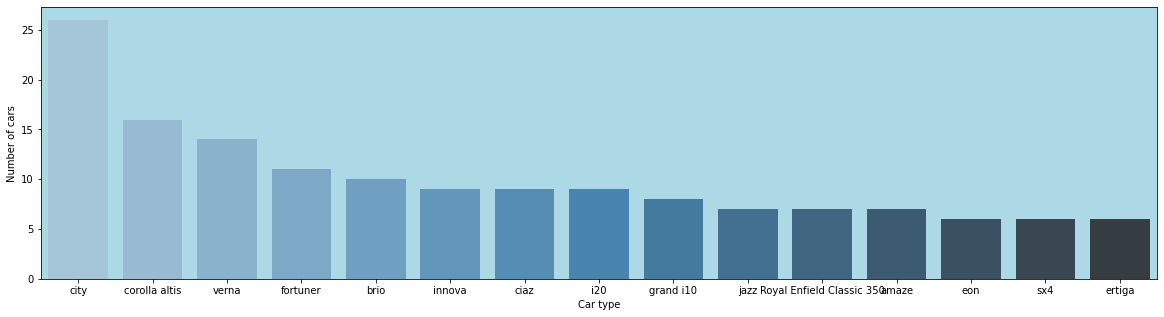

In [116]:
plt.figure(figsize=(20,5))

ax = plt.axes()
ax.set(facecolor = 'lightblue')
car_name=dataset['Car_Name'].value_counts().nlargest(15).sort_values(ascending=False).reset_index()
sns.barplot(car_name['index'],car_name['Car_Name'],palette="Blues_d",color='smoker')
plt.xlabel('Car type')
plt.ylabel('Number of cars')


We can see city and corolla atlis has the highest and second highest car types in the dataset

In [117]:
##Removing Indentifiers
dataset=dataset.drop('Car_Name',axis=1)

In [118]:
## Diffrent type of years in which the car was bought
dataset['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of cars')

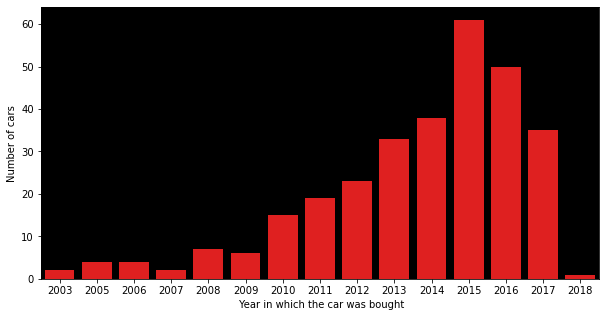

In [119]:
plt.figure(figsize=(10,5))

ax = plt.axes()
ax.set(facecolor = 'black')
car_name=dataset['Year'].value_counts().nlargest(15).sort_values(ascending=False).reset_index()
sns.barplot(car_name['index'],car_name['Year'],color='Red',)
plt.xlabel(' Year in which the car was bought')
plt.ylabel('Number of cars')

We can see that the distribution is right skewed and In 2015 people bought most cars

Text(0, 0.5, 'Number of cars')

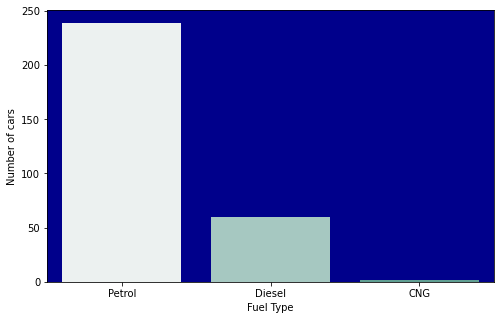

In [120]:
##Fuel Type of the vehicle
plt.figure(figsize=(8,5))

ax = plt.axes()
ax.set(facecolor = 'darkblue')
Fuel_type=dataset['Fuel_Type'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(x=Fuel_type['index'],y=Fuel_type['Fuel_Type'],palette="light:#5A9")
plt.xlabel('Fuel Type')
plt.ylabel('Number of cars')


<AxesSubplot:xlabel='index', ylabel='Transmission'>

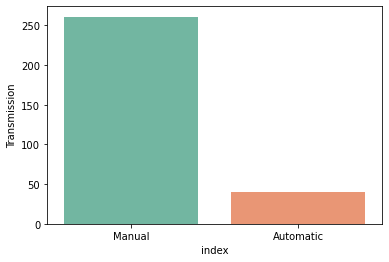

In [121]:
## The type of transmission the car has

Transmission_type=dataset['Transmission'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(x=Transmission_type['index'],y=Transmission_type['Transmission'],palette="Set2")

Text(0.5, 0, 'The distribution of Seller Type of vehicle')

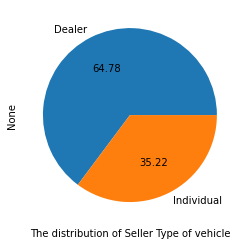

In [122]:

dataset.groupby('Seller_Type').size().plot(kind='pie', autopct='%.2f')
plt.xlabel('The distribution of Seller Type of vehicle')

In [123]:
## Total kms driven statistic detail
dataset['Kms_Driven'].describe()

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64

<AxesSubplot:title={'center':'The count of Kms Driven by the vehicle'}, xlabel='Kms_Driven', ylabel='Count'>

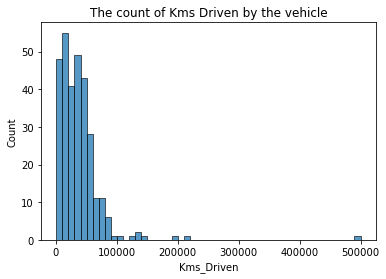

In [124]:
plt.title('The count of Kms Driven by the vehicle')
sns.histplot(dataset['Kms_Driven'])

There is an oulier in the Kms driven

<AxesSubplot:title={'center':'Distribution based on fuel type for total Kms driven'}, xlabel='Fuel_Type', ylabel='Kms_Driven'>

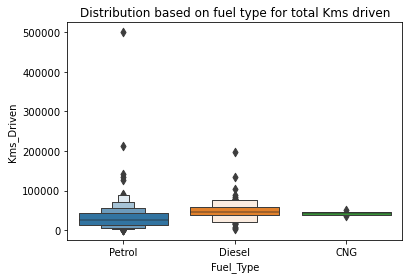

In [126]:
plt.title('Distribution based on fuel type for total Kms driven')
sns.boxenplot(y=dataset['Kms_Driven'],x=dataset['Fuel_Type'])

<AxesSubplot:xlabel='Transmission', ylabel='Kms_Driven'>

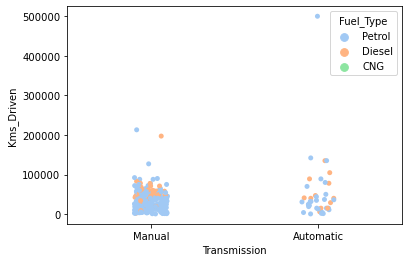

In [127]:
 
sns.stripplot(data=dataset,y='Kms_Driven',x='Transmission',hue='Fuel_Type',palette='pastel', )

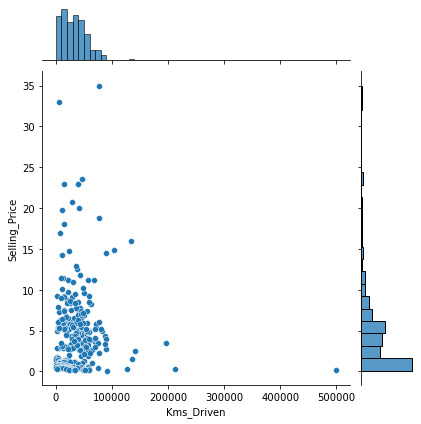

In [128]:
sns.jointplot(x='Kms_Driven',y='Selling_Price',data=dataset)

#selling price reduces based on km driven

In [129]:
dataset1=dataset.copy()
dataset1['Price_depriciation']=dataset['Present_Price'] - dataset['Selling_Price']

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>,
        <AxesSubplot:title={'center':'Price_depriciation'}>]],
      dtype=object)

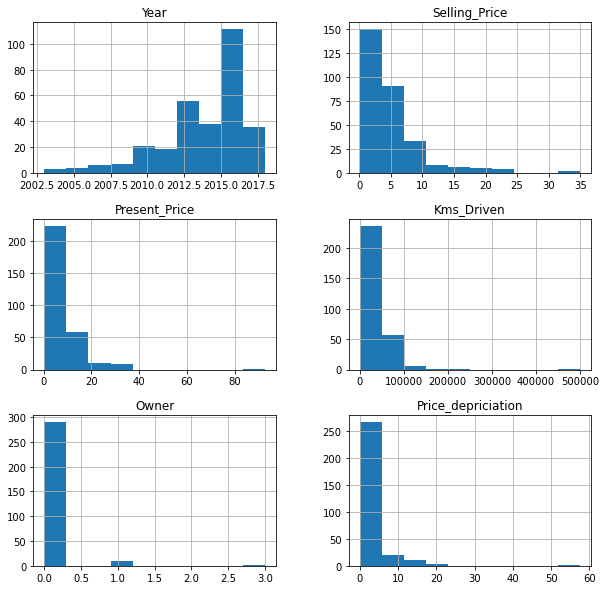

In [130]:
## The distribution of all the numerical features
dataset1.hist(figsize=(10,10))

### Feature Engineering

In [131]:
## Adding a column for present year
dataset1["Present_Year"]=2021
dataset1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_depriciation,Present_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,2021


In [132]:
## Calculation car's age
dataset1['Car_age']=dataset1["Present_Year"]-dataset1["Year"]
dataset1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_depriciation,Present_Year,Car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,2021,7


In [133]:
## Dropping the values of redundant feature
dataset1.drop(["Present_Year", "Year"], axis=1,inplace = True)
dataset1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_depriciation,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,7


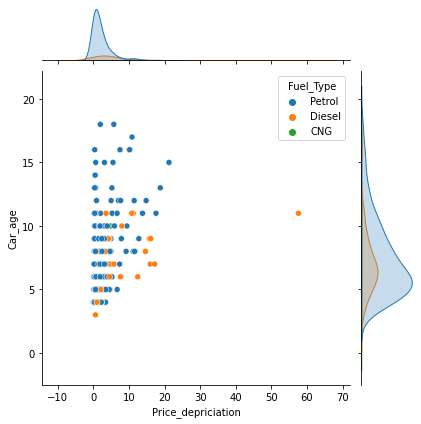

In [134]:
sns.jointplot(x='Price_depriciation',y='Car_age',data=dataset1,hue='Fuel_Type')

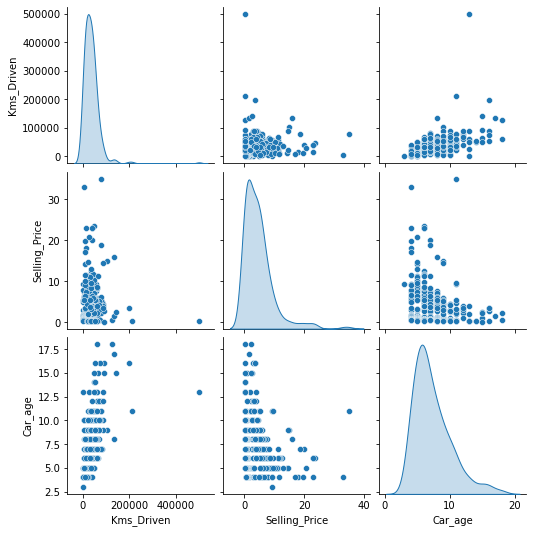

In [135]:
sns.pairplot(dataset1[['Kms_Driven', 'Selling_Price', 'Car_age']], diag_kind='kde')

Text(0.5, 1.0, 'Selling Price range by Car Age')

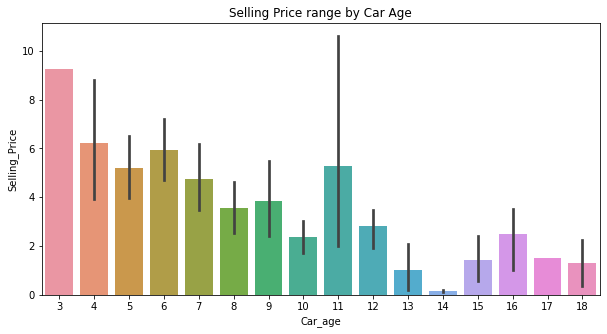

In [136]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x='Car_age',y='Selling_Price',data=dataset1).set_title('Selling Price range by Car Age')

In [138]:
## Encoding Categorical Features

dataset2=pd.get_dummies(dataset1, drop_first=True)
dataset2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Price_depriciation,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2.24,7,0,1,0,1
1,4.75,9.54,43000,0,4.79,8,1,0,0,1
2,7.25,9.85,6900,0,2.60,4,0,1,0,1
3,2.85,4.15,5200,0,1.30,10,0,1,0,1
4,4.60,6.87,42450,0,2.27,7,1,0,0,1


In [139]:
## Dropping unimportant features
dataset2.drop(['Fuel_Type_Petrol','Seller_Type_Individual'], axis=1,inplace = True)
dataset2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Price_depriciation,Car_age,Fuel_Type_Diesel,Transmission_Manual
0,3.35,5.59,27000,0,2.24,7,0,1
1,4.75,9.54,43000,0,4.79,8,1,1
2,7.25,9.85,6900,0,2.60,4,0,1
3,2.85,4.15,5200,0,1.30,10,0,1
4,4.60,6.87,42450,0,2.27,7,1,1


In [140]:
# Outlier analysis:
from scipy.stats import zscore
dataset2['Zscore_SP']=zscore(data.Selling_Price)
dataset2[(dataset2.Zscore_SP>3.0) | (dataset2.Zscore_SP<-3.0)]

,Selling_Price,Present_Price,Kms_Driven,Owner,Price_depriciation,Car_age,Fuel_Type_Diesel,Transmission_Manual,Zscore_SP
51,23.00,30.61,40000,0,7.61,6,1,0,3.613993
59,19.99,35.96,41000,0,15.97,7,1,0,3.020815
63,23.50,35.96,47000,0,12.46,6,1,0,3.712527
64,33.00,36.23,6000,0,3.23,4,1,0,5.584684
82,23.00,25.39,15000,0,2.39,4,1,0,3.613993
86,35.00,92.60,78000,0,57.60,11,1,1,5.978822
93,23.00,30.61,40000,0,7.61,6,1,0,3.613993
96,20.75,25.39,29000,0,4.64,5,1,0,3.170587


{'whiskers': [<matplotlib.lines.Line2D at 0x26ed50ebeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x26ed50fa5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ed50ebb50>],
 'medians': [<matplotlib.lines.Line2D at 0x26ed50fac70>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ed50fafd0>],
 'means': []}

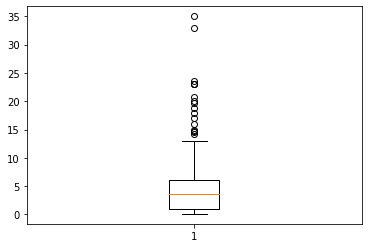

In [141]:
plt.boxplot(dataset2["Selling_Price"])

There are outliers in the dependent variable

Existence of high corelation between independent variables is called Multi Collinearity. Presence of multi collinearity can distabilize regression models. So it is better to identify multi collinearity and remove them from data appropiately. Here, I am using figure and heat map function in matplotlib library to plot correlation between independent variables in a heatmap.

<AxesSubplot:>

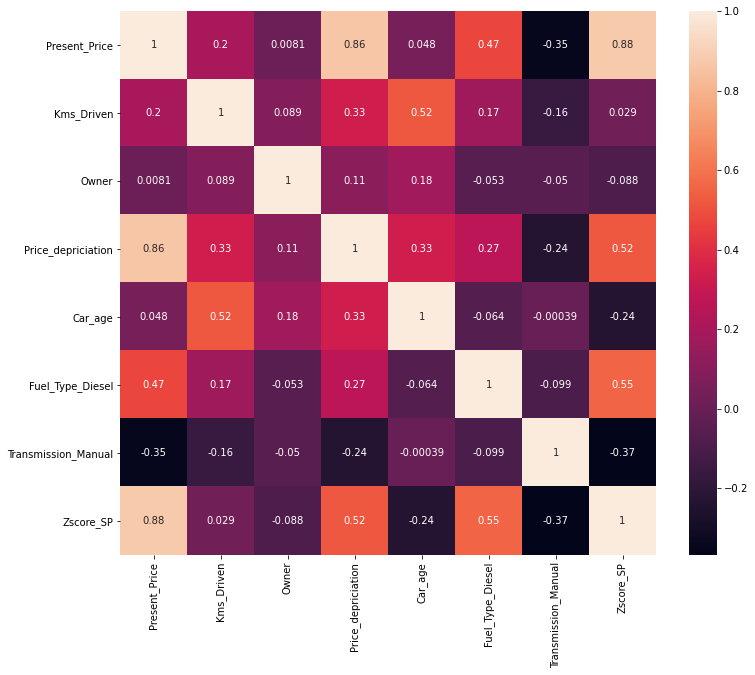

In [142]:
plt.figure(figsize=(12, 10))
data_x=dataset2.drop('Selling_Price',axis=1)
sns.heatmap(data_x.corr(), annot=True)

In [145]:
dataset2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Price_depriciation,Car_age,Fuel_Type_Diesel,Transmission_Manual,Zscore_SP
0,3.35,5.59,27000,0,2.24,7,0,1,-0.258416
1,4.75,9.54,43000,0,4.79,8,1,1,0.017481
2,7.25,9.85,6900,0,2.60,4,0,1,0.510154
3,2.85,4.15,5200,0,1.30,10,0,1,-0.356950
4,4.60,6.87,42450,0,2.27,7,1,1,-0.012079


In [147]:
scaling_feature=[feature for feature in dataset2.columns if feature not in ['Selling_Price','Zscore_SP'] ]
len(scaling_feature)

7

### Feature Scaling

In [148]:
feature_scale=[feature for feature in data.columns if feature not in ['Selling_Price','Zscore_SP']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset2[scaling_feature])

MinMaxScaler()

In [151]:
 dataset3_scaled = pd.concat([dataset2['Selling_Price'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset2[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [153]:
dataset3_scaled.head()         

,Selling_Price,Present_Price,Kms_Driven,Owner,Price_depriciation,Car_age,Fuel_Type_Diesel,Transmission_Manual
0,3.35,0.057109,0.053053,0.0,0.038388,0.266667,0.0,1.0
1,4.75,0.099913,0.085085,0.0,0.082682,0.333333,1.0,1.0
2,7.25,0.103273,0.012813,0.0,0.044641,0.066667,0.0,1.0
3,2.85,0.041504,0.009409,0.0,0.022060,0.466667,0.0,1.0
4,4.60,0.070980,0.083984,0.0,0.038909,0.266667,1.0,1.0


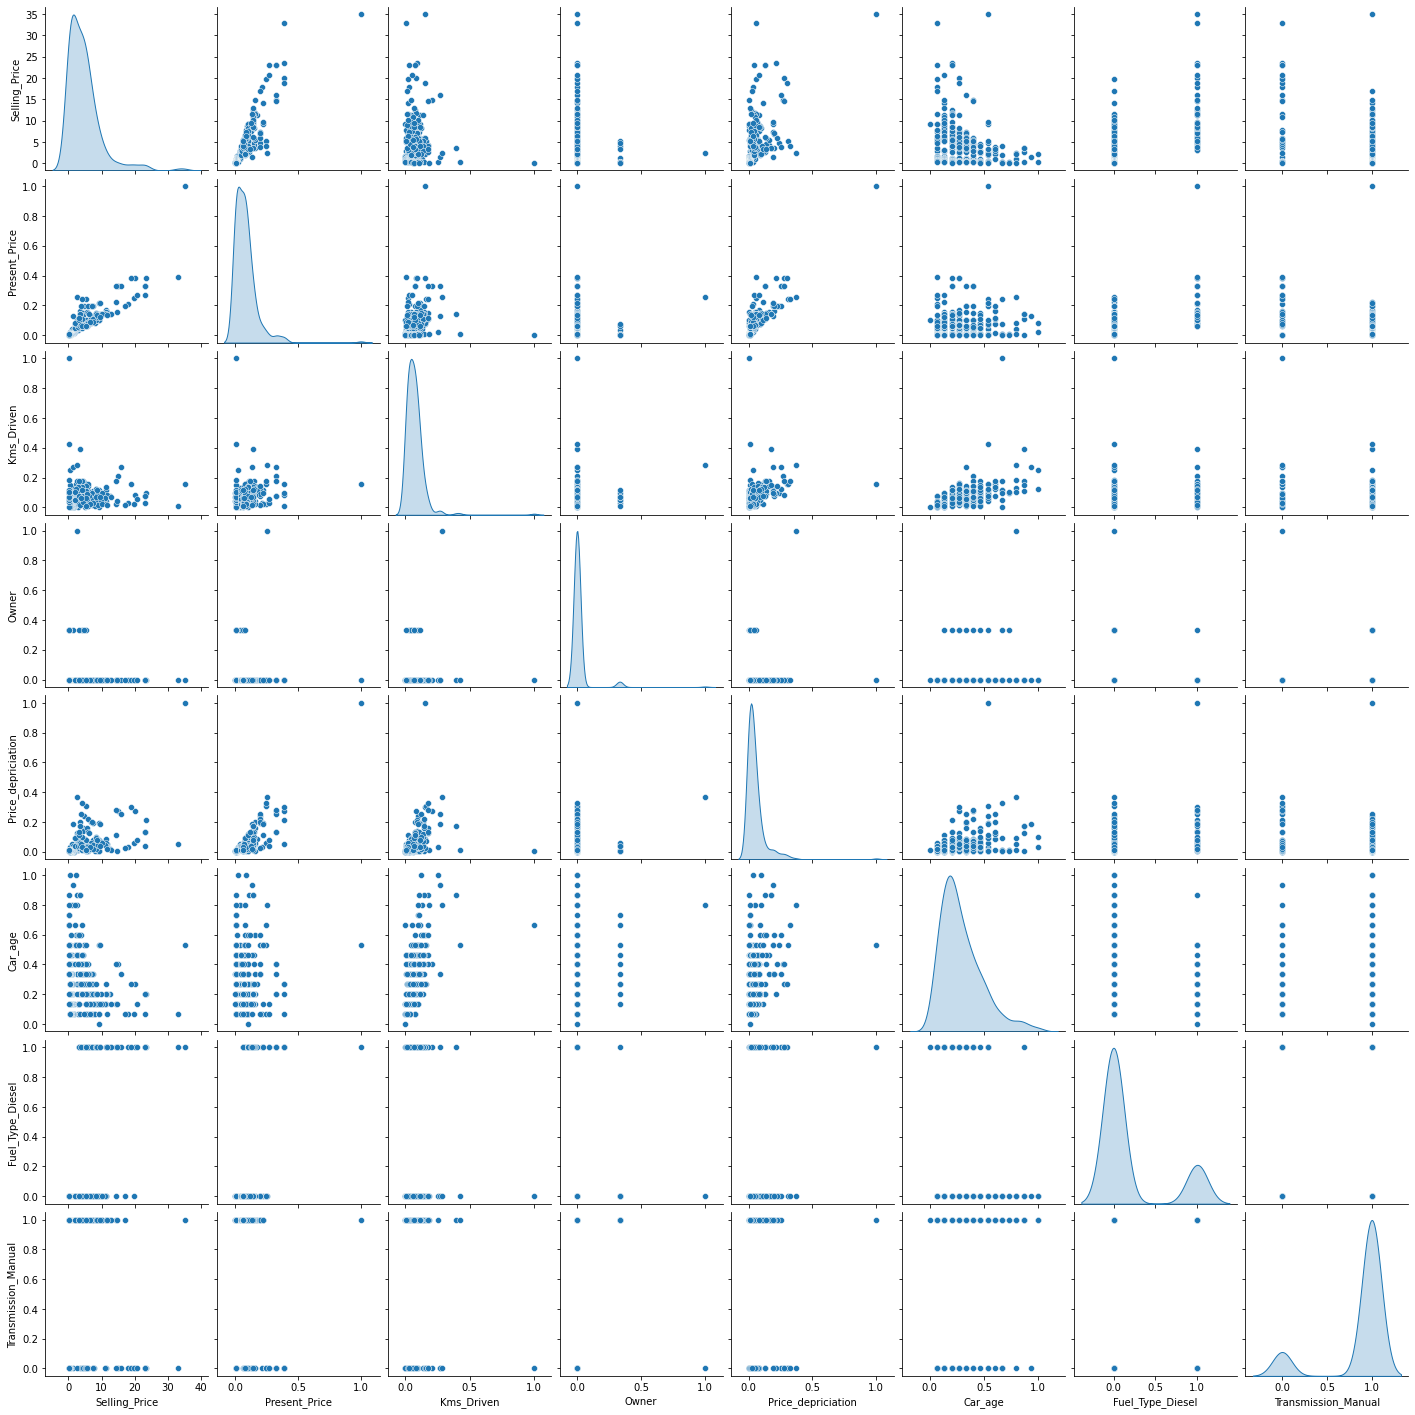

In [155]:
sns.pairplot(dataset3_scaled, diag_kind='kde')

In [160]:
dataset3_scaled.to_csv('dataset3_scaled',index=False)

### Feature Selection

In [162]:
dataset4=pd.read_csv('dataset3_scaled')
dataset4.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Price_depriciation,Car_age,Fuel_Type_Diesel,Transmission_Manual
0,3.35,0.057109,0.053053,0.0,0.038388,0.266667,0.0,1.0
1,4.75,0.099913,0.085085,0.0,0.082682,0.333333,1.0,1.0
2,7.25,0.103273,0.012813,0.0,0.044641,0.066667,0.0,1.0
3,2.85,0.041504,0.009409,0.0,0.022060,0.466667,0.0,1.0
4,4.60,0.070980,0.083984,0.0,0.038909,0.266667,1.0,1.0


In [166]:
## Capturing dependent and independent features
X_train=dataset4.drop('Selling_Price',axis=1)
y_train=dataset4['Selling_Price']

In [168]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [173]:
## Apply Feature Selection
# first, Specifying the Lasso Regression model
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then we use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero

feature_sel_model=SelectFromModel(Lasso(alpha=0.0002,random_state=0))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.0002, random_state=0))

In [174]:
feature_sel_model.get_support()

array([ True, False, False,  True,  True,  True,  True])

In [178]:
# let's print the number of total and selected features
selected_features=X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('Total features in dataset was{}'.format(X_train.shape[1]))
print('Selected Features are {}'.format(len(selected_features)))
print('Features whose coefficients shrank to zero: {}'.format(X_train.shape[1]-len(selected_features)))

Total features in dataset was7
Selected Features are 5
Features whose coefficients shrank to zero: 2


In [179]:
selected_features


Index(['Present_Price', 'Price_depriciation', 'Car_age', 'Fuel_Type_Diesel',
       'Transmission_Manual'],
      dtype='object')

In [ ]:
X=data[['Present_Price','Kms_Driven','Owner','Price_depriciation','Car_age','Fuel_Type_Diesel','Transmission_Manual']]
y=data['Selling_Price']

In [ ]:
###train_test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split()

In [193]:
data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Price_depriciation', 'Car_age', 'Fuel_Type_Diesel',
       'Transmission_Manual', 'Zscore_SP'],
      dtype='object')